In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import re
import itertools
import scipy.stats as ss
import seaborn as sns
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

In [19]:
path1 = '/Users/s0c02nj/Desktop/Personal Edu doc/Theoritical Research/Mixed-space/Salary/'
path2 = 'Mixed space model.csv'

mydata = pd.read_csv(path1+path2)

### UCI Machine Learning Repository 
#### Adult Data Set
##### http://archive.ics.uci.edu/ml/datasets/Adult


+ Attribute Information:
+ Listing of attributes:



+ To predict : Salary >50K,<=50K.
+ age: continuous.
+ workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
+ fnlwgt: continuous.
+ education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

+ education-num: continuous.
+ marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
+ occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
+ relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
+ race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
+ sex: Female, Male.
+ capital-gain: continuous.
+ capital-loss: continuous.
+ hours-per-week: continuous.
+ native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad

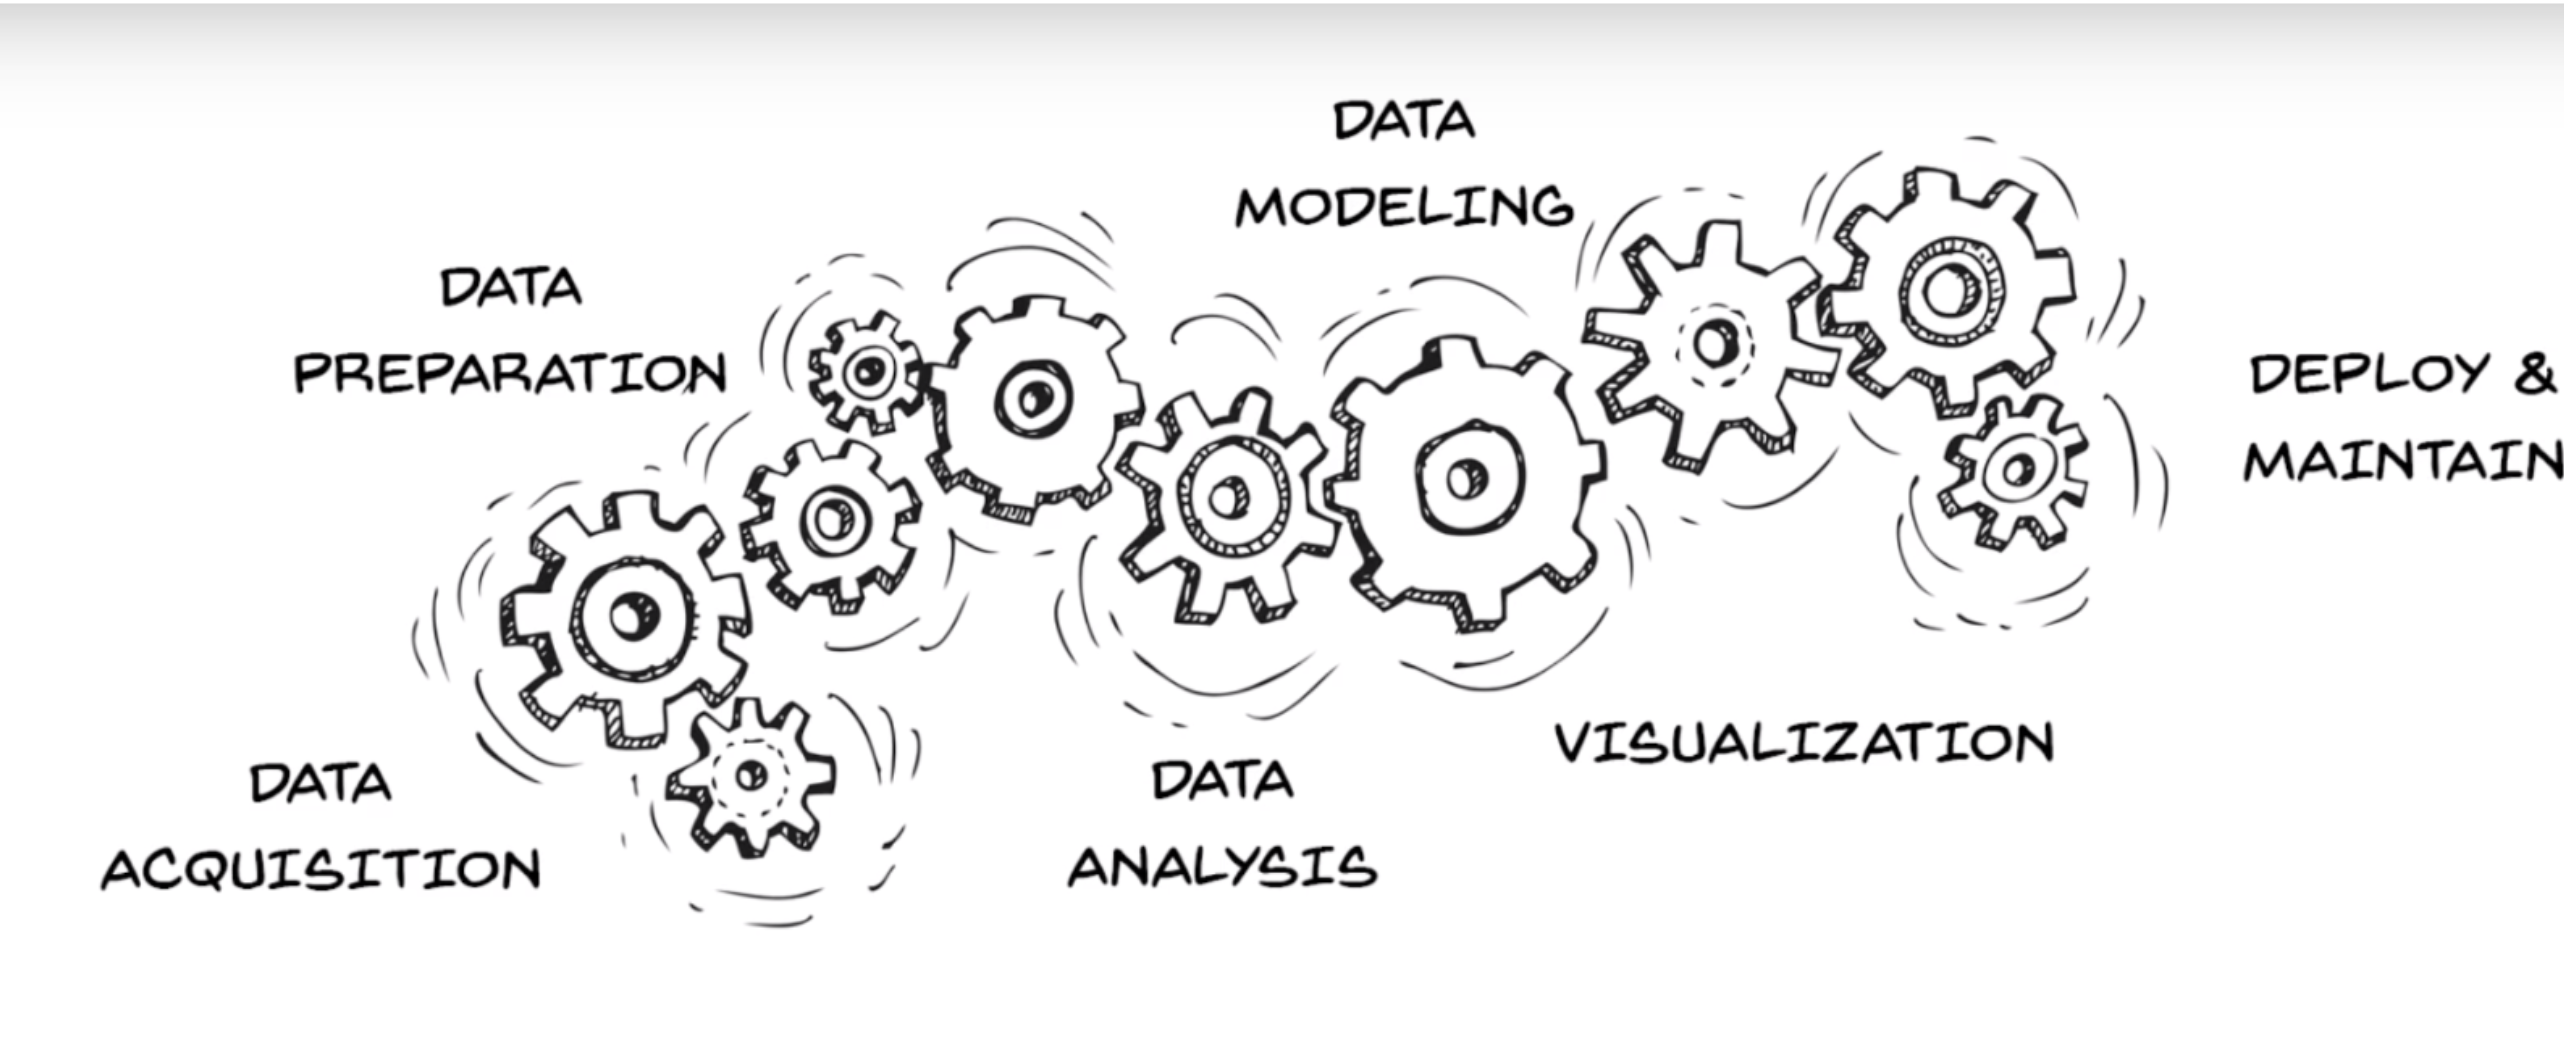

In [20]:
mydata.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
mydata_copy = mydata.copy()

#### Check Missing Values

In [25]:
mydata_copy.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Salary            0
dtype: int64

#### Continuous Variables

In [24]:
#List of Continuous variables 
cont_var = ['age', 'fnlwgt', 'education-num' , 'capital-gain', 'capital-loss' , 'hours-per-week']

#Standardizing the Continuous Variables 
scale = StandardScaler()
mydata_copy[cont_var] = scale.fit_transform(mydata_copy[cont_var])

#Dataframe of Standardized Continuous variable
df_cont = mydata_copy[cont_var]

In [26]:
#List of Continuous variables 
cat_var = ['marital-status','relationship' ,'race','sex','education','workclass','occupation','native-country']
df_cat = mydata_copy[cat_var]


for f in cat_var: 
    df1 = df_cat[[f]]

    df2 = (pd.get_dummies(df1, prefix='', prefix_sep='')
                   .max(level=0, axis=1)
                   .add_prefix(f+'-'))  
    # the new feature names will be "<old_feature_name> - <categorical_value>"
    # for example, "Cars" will get transformed to "Cars - Minivan", "Cars - Truck", etc


    # add the new one-hot encoded column to the dataframe
    df_cat = pd.concat([df_cat, df2], axis=1)

    #Removing the original columns
    df_cat = df_cat.drop([f], axis=1) 

In [29]:
df_cat.head()

,marital-status- Divorced,marital-status- Married-AF-spouse,marital-status- Married-civ-spouse,marital-status- Married-spouse-absent,marital-status- Never-married,marital-status- Separated,marital-status- Widowed,relationship- Husband,relationship- Not-in-family,relationship- Other-relative,...,native-country- Portugal,native-country- Puerto-Rico,native-country- Scotland,native-country- South,native-country- Taiwan,native-country- Thailand,native-country- Trinadad&Tobago,native-country- United-States,native-country- Vietnam,native-country- Yugoslavia
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Univariate Analysis

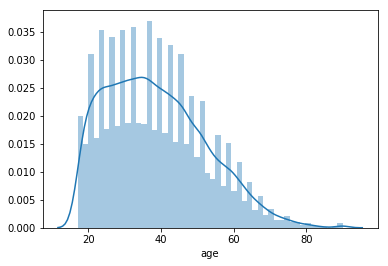

In [93]:
sns.distplot(mydata['age'])

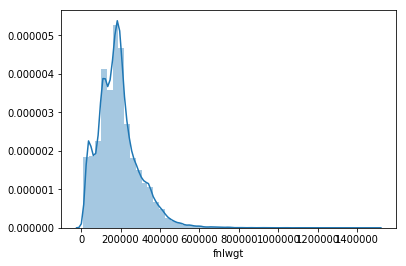

In [94]:
sns.distplot(mydata['fnlwgt'])

#### Univariate Distribution Checking --- Normality check

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

#### Correlation Checking between variables

+ 1. Checking correlation between continuous variables --->. Correlation coefficient

In [32]:
df_cont.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [33]:
df_cont.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [35]:
pd.crosstab(mydata_copy['education'],mydata_copy['occupation'])


occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
education,,,,,,,,,,,,,,,
10th,102,38,0,170,24,44,71,101,194,6,9,6,81,3,84
11th,119,67,0,175,34,37,123,99,238,14,20,7,144,6,92
12th,40,38,1,58,13,16,38,35,85,4,10,6,47,3,39
1st-4th,12,0,0,23,4,18,16,23,40,11,4,1,8,0,8
5th-6th,30,6,0,43,1,36,40,56,64,14,1,1,12,1,28
7th-8th,73,11,0,116,19,70,46,93,98,8,9,9,29,5,60
9th,51,14,0,96,13,28,49,76,101,10,3,4,32,2,35
Assoc-acdm,47,193,0,115,145,14,24,33,78,2,138,34,144,73,27
Assoc-voc,61,167,0,252,150,52,28,63,115,4,170,48,106,126,40


In [42]:
confusion_matrix = pd.crosstab(mydata_copy['education'],mydata_copy['occupation'])


Ref : https://www.youtube.com/watch?v=XtpTKdenlcA

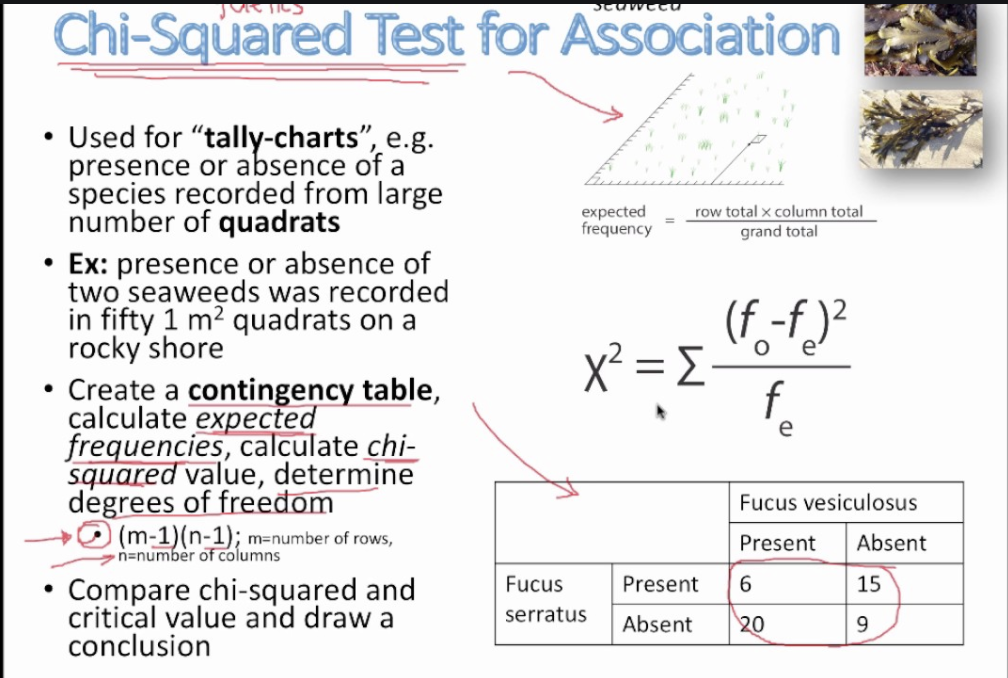

In [40]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [48]:
chi2, p, dof, ex = ss.chi2_contingency(confusion_matrix)

In [49]:
p

0.0

#### Modelling Logistic Regression

In [51]:
df_comb = pd.concat([df_cat,df_cont],axis=1)

In [61]:
le = LabelEncoder()
y = le.fit_transform(mydata['Salary'])

In [62]:
y.shape

(32561,)

In [54]:
df_comb.shape

(32561, 108)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df_comb, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/Users/s0c02nj/anaconda2/envs/graph/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [75]:
# fit the model
clf.score(X_train, y_train)

0.8530369012147605

In [76]:
# validate the model
clf.score(X_test, y_test)

0.855108877721943

In [77]:
clf.coef_

array([[-0.67038924,  1.42686971,  1.42402071, -0.69003721, -1.11043733,
        -0.73771874, -0.5488318 , -0.33339616,  0.10031958, -0.67534663,
        -1.11241735,  0.0262708 ,  1.08804586, -0.45551732,  0.07090787,
        -0.07732004, -0.52132426,  0.07672985, -0.88473005, -0.02179385,
        -0.00989638, -0.40820563, -0.00679521,  0.5619073 , -0.14187743,
        -0.02039292,  0.03423852, -0.40273306, -0.17492675, -0.11690961,
         0.11306089, -0.17587061,  0.00999921, -0.33616441,  0.27691613,
        -0.10887395, -0.22667919,  0.64003533, -0.10940996, -0.12984914,
         0.10626024,  0.22387906, -0.38926389, -0.19723045, -0.82426591,
        -0.35652833,  0.0993295 , -0.24258956,  0.17887451,  0.87038558,
        -0.93641966, -0.58648159, -0.23162798, -0.65763918, -1.48775397,
         0.55496195,  0.6989337 ,  0.38695941,  0.81051845, -0.00744671,
        -0.14915417,  0.90298633,  0.44678896, -0.81953646, -1.46505099,
         0.40663205, -0.69010342, -0.53029931, -0.1

In [79]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [148]:
#clf.decision_function(X_test)

#### Modelling Decision Tree

In [105]:
#List of Continuous variables 
cont_var = ['age', 'fnlwgt', 'education-num' , 'capital-gain', 'capital-loss' , 'hours-per-week']

#Dataframe of Standardized Continuous variable
df_cont = mydata[cont_var]

In [107]:
cat_var = ['marital-status','relationship' ,'race','sex','education','workclass','occupation','native-country']

df_cat = mydata_copy[cat_var]


for col in tqdm(cat_var): 
    
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])


  0%|          | 0/8 [00:00<?, ?it/s]/Users/s0c02nj/anaconda2/envs/graph/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
100%|██████████| 8/8 [00:00<00:00, 134.12it/s]


In [110]:
df_cat.head()

,marital-status,relationship,race,sex,education,workclass,occupation,native-country
0,4,1,4,1,9,7,1,39
1,2,0,4,1,9,6,4,39
2,0,1,4,1,11,4,6,39
3,2,0,2,1,1,4,6,39
4,2,5,2,0,9,4,10,5


In [111]:
df_comb = pd.concat([df_cat,df_cont],axis=1)

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(df_comb, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [132]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0,max_depth=9).fit(X_train, y_train)

In [130]:
# fit the model
clf.score(X_train, y_train)

0.8633509053403622

In [131]:
# validate the model
clf.score(X_test, y_test)

0.85464358831193

#### Modelling Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
clf = RandomForestClassifier(max_depth=15, random_state=0,
                             n_estimators= 500).fit(X_train, y_train)

In [145]:
# fit the model
clf.score(X_train, y_train)

0.9169378867751548

In [146]:
# validate the model
clf.score(X_test, y_test)

0.8657174762702401